# Statistics
Here we prepared basic statistics about our dataset.
- number of chant records
- out of them, how many have:
    - some melody in volpiano
    - melody in volpiano - more than 20 notes
______
- number of source manuscripts of these records
- out of them, how many have:
    - provenance
    - century
    - cursus

------
- plot distributions of some values over chants or sources
- plot distribution of data over databases

In [ ]:
import pandas as pd

In [6]:
FINAL_CHANTS_CSV_PATH = 'cantuscorpus_1.0/chants.csv' # Rename to fit your directory structure or fit your structure into this
FINAL_SOURCES_CSV_PATH = 'cantuscorpus_1.0/sources.csv' # Rename to fit your directory structure or fit your structure into this

In [7]:
# Load data
chants = pd.read_csv(FINAL_CHANTS_CSV_PATH, dtype=str)
sources = pd.read_csv(FINAL_SOURCES_CSV_PATH, dtype=str)

## Chants

In [8]:
from volpiano_utils import clean_volpiano
print('number of chants records after all processing:', len(chants))
print('out of them number of:')
print('\tchant records with some melody in volpiano:', len(chants['melody'].dropna()))
print('\tchant records with melody of more than 20 notes:', chants['melody'].dropna().apply(lambda x: len(clean_volpiano(x)) >= 20).sum())

number of chants records after all processing: 888010
out of them number of:
	chant records with some melody in volpiano: 60588
	chant records with melody of more than 20 notes: 44625


## Sources

In [9]:
print('number of sources records after all processing:', len(sources))
print('out of them number of:')
print('\tsources with provenance value:', len(sources[sources['provenance'].notna()]))
print('\tsources with century value:', len(sources[sources['century'].notna()]))
print('\tsources with cursus value:', len(sources[sources['cursus'].notna()]) - len(sources[sources['cursus'] == 'unknown']))

number of sources records after all processing: 2278
out of them number of:
	sources with provenance value: 1606
	sources with century value: 2240
	sources with cursus value: 345


## Distribution plots

In [10]:
import matplotlib.pyplot as plt
import numpy as np

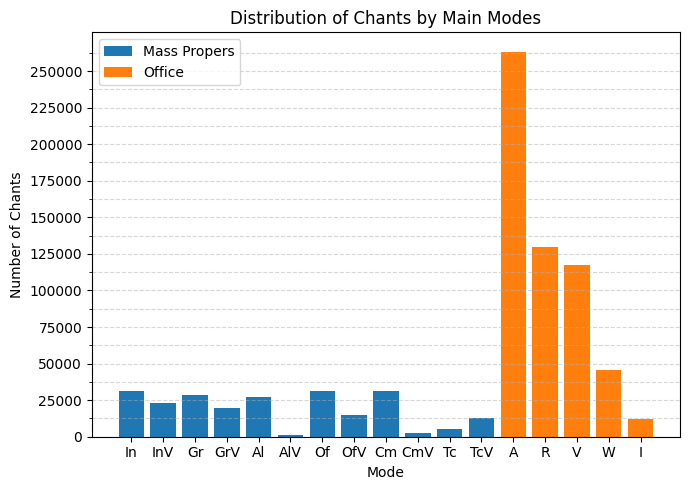

In [11]:
# Plot distribution of chants in selected main genres
GENRES_MASS_PROPERS = ['In', 'InV', 'Gr', 'GrV', 'Al', 'AlV', 'Of', 'OfV', 'Cm', 'CmV', 'Tc', 'TcV']
GENRES_OFFICE = ['A', 'R', 'V', 'W', 'I']
MAIN_GENRES = GENRES_MASS_PROPERS + GENRES_OFFICE
genre_counts = chants['genre'].dropna().value_counts().loc[MAIN_GENRES].to_dict()

# Plot
plt.figure(figsize=(7, 5))
# Prepare colors and labels
colors = []
for genre in MAIN_GENRES:
    if genre in GENRES_MASS_PROPERS:
        colors.append('tab:blue')
    else:
        colors.append('tab:orange')

plt.bar(genre_counts.keys(), genre_counts.values(), color=colors)

plt.title('Distribution of Chants by Main Modes')
plt.xlabel('Mode')
plt.ylabel('Number of Chants')
plt.xticks(rotation=0)

# Add more frequent gridlines
max_y = 252000
grid_interval = 12500
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))
plt.gca().set_yticks(np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='tab:blue', label='Mass Propers'),
    Patch(facecolor='tab:orange', label='Office')
]
plt.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()

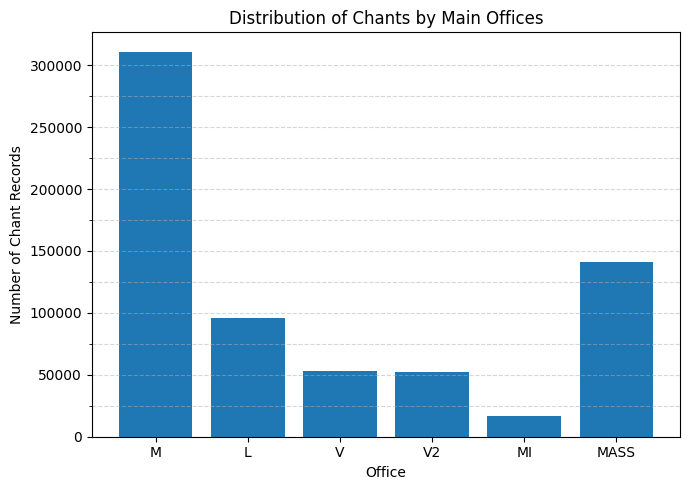

In [12]:
# Plot istrbution of chants in selected main offices
MAIN_OFFICES = ['M', 'L', 'V', 'V2', 'MI', 'MASS']
office_counts = chants['office'].value_counts().loc[MAIN_OFFICES].to_dict()

# Plot
plt.figure(figsize=(7, 5))
plt.bar(office_counts.keys(), office_counts.values(), color='tab:blue')

plt.title('Distribution of Chants by Main Offices')
plt.xlabel('Office')
plt.ylabel('Number of Chant Records')
plt.xticks(rotation=0)

# Add more frequent gridlines
max_y = 300000
grid_interval = 25000
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))
plt.gca().set_yticks(np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#kind='bar', xlabel='Office', ylabel='Number of chants', figsize=(7, 5))

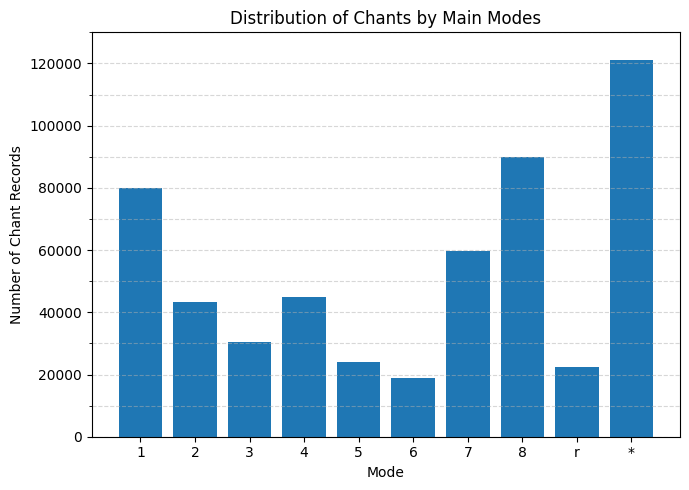

In [13]:
# Plot distribution of selected main modes
MAIN_MODES = ['1', '2', '3', '4', '5', '6', '7', '8', 'r', '*']
mode_counts = chants['mode'].value_counts().loc[MAIN_MODES].to_dict()

# Plot
plt.figure(figsize=(7, 5))
plt.bar(mode_counts.keys(), mode_counts.values(), color='tab:blue')

plt.title('Distribution of Chants by Main Modes')
plt.xlabel('Mode')
plt.ylabel('Number of Chant Records')
plt.xticks(rotation=0)

# Add more frequent gridlines
max_y = 125000
grid_interval = 10000
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))
plt.gca().set_yticks(np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

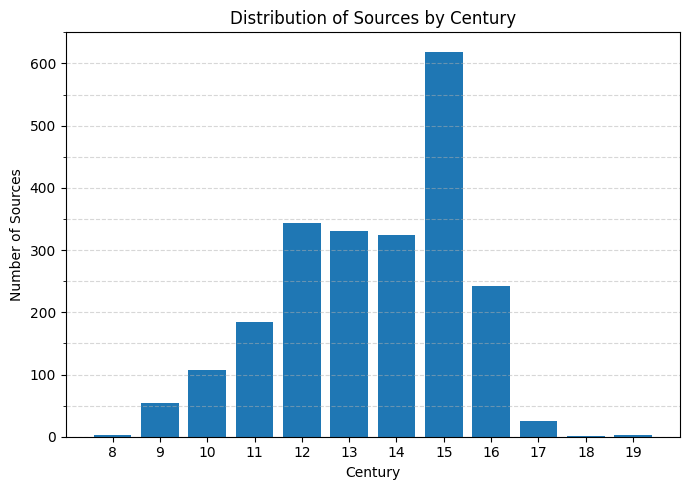

In [14]:
# Distribution of sources by century - use num_century column retyped to int
century_counts = (
    sources['num_century']
    .dropna()
    .astype(int)
    .value_counts()
    .sort_index()
)

# Plot
plt.figure(figsize=(7, 5))
plt.bar(century_counts.index.astype(str), century_counts.values, color='tab:blue')

plt.title('Distribution of Sources by Century')
plt.xlabel('Century')
plt.ylabel('Number of Sources')

max_y = century_counts.values.max()
grid_interval = 50
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))  # actual labeled ticks (less frequent)
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)
plt.gca().set_yticks(np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)

plt.tight_layout()
plt.show()

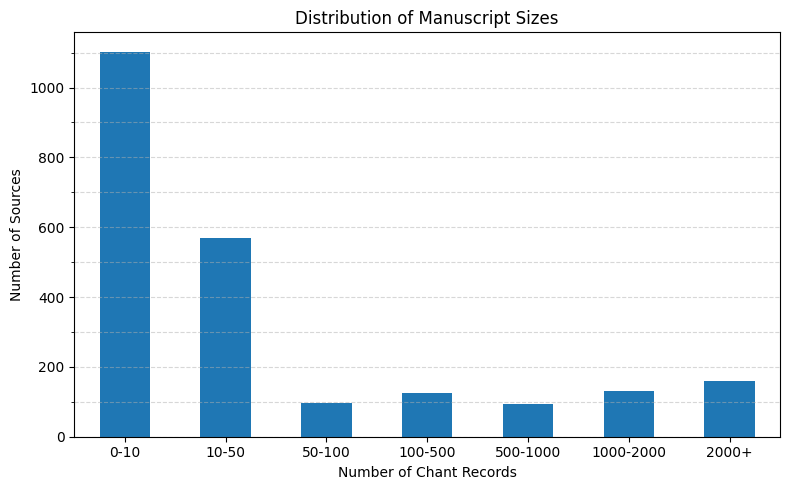

In [15]:
srclink_counts = chants['srclink'].value_counts()
bins = [0, 10, 50, 100, 500, 1000, 2000, float('inf')]
labels = ['0-10', '10-50', '50-100', '100-500', '500-1000', '1000-2000', '2000+']
binned = pd.cut(srclink_counts, bins=bins, labels=labels, right=False)
histogram = binned.value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
histogram.plot(kind='bar', color='tab:blue')

plt.title('Distribution of Manuscript Sizes')
plt.xlabel('Number of Chant Records')
plt.ylabel('Number of Sources')
plt.xticks(rotation=0)

max_y = 1100
grid_interval = 100
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))  # actual labeled ticks (less frequent)
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)
plt.gca().set_yticks(np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)

plt.tight_layout()
plt.show()

### Databases point of view

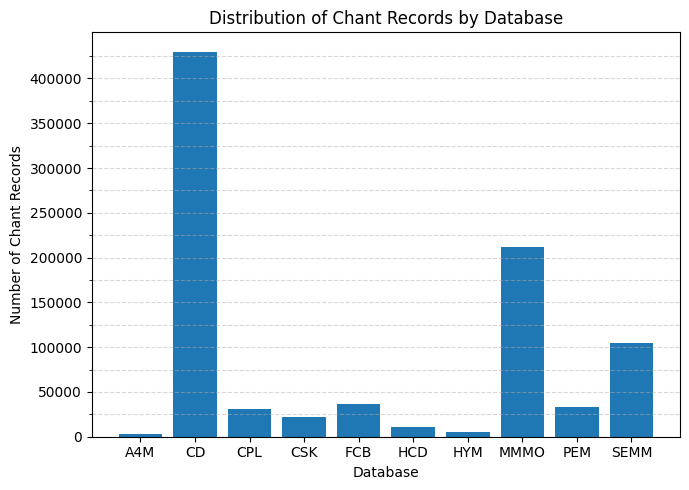

In [16]:
# Distribution of chant records by db
db_counts = (
    chants['db']
    .dropna()
    .value_counts()
    .sort_index()
)

# Plot
plt.figure(figsize=(7, 5))
plt.bar(db_counts.index.astype(str), db_counts.values, color='tab:blue')

plt.title('Distribution of Chant Records by Database')
plt.xlabel('Database')
plt.ylabel('Number of Chant Records')

max_y = 420000
grid_interval = 25000
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))  # actual labeled ticks (less frequent)
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)
plt.gca().set_yticks(np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)

plt.tight_layout()
plt.show()

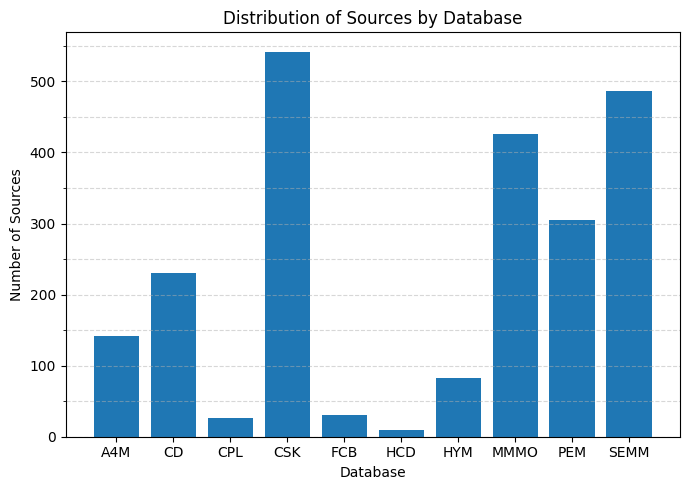

In [17]:
# Distribution of source records by db
srclinks_per_db = chants.groupby('db')['srclink'].nunique().to_dict()

# Plot
plt.figure(figsize=(7, 5))
plt.bar(srclinks_per_db.keys(), srclinks_per_db.values(), color='tab:blue')

plt.title('Distribution of Sources by Database')
plt.xlabel('Database')
plt.ylabel('Number of Sources')

max_y = 550
grid_interval = 50
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))  # actual labeled ticks (less frequent)
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)
plt.gca().set_yticks(np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)

plt.tight_layout()
plt.show()

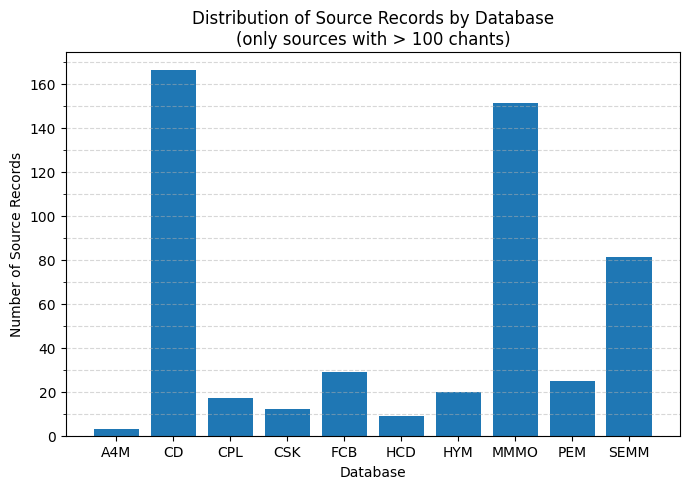

In [18]:
# Distribution of Source Records by Database for sources with more than 100 chants
frequent_srclinks = chants['srclink'].value_counts()
srclinks_to_keep = frequent_srclinks[frequent_srclinks > 100].index
filtered_chants = chants[chants['srclink'].isin(srclinks_to_keep)]

srclinks_per_db = filtered_chants.groupby('db')['srclink'].nunique().to_dict()

# Plot
plt.figure(figsize=(7, 5))
plt.bar(srclinks_per_db.keys(), srclinks_per_db.values(), color='tab:blue')

plt.title('Distribution of Source Records by Database\n(only sources with > 100 chants)')
plt.xlabel('Database')
plt.ylabel('Number of Source Records')

max_y = 170
grid_interval = 10
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))  # actual labeled ticks (less frequent)
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)
plt.gca().set_yticks(np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)

plt.tight_layout()
plt.show()

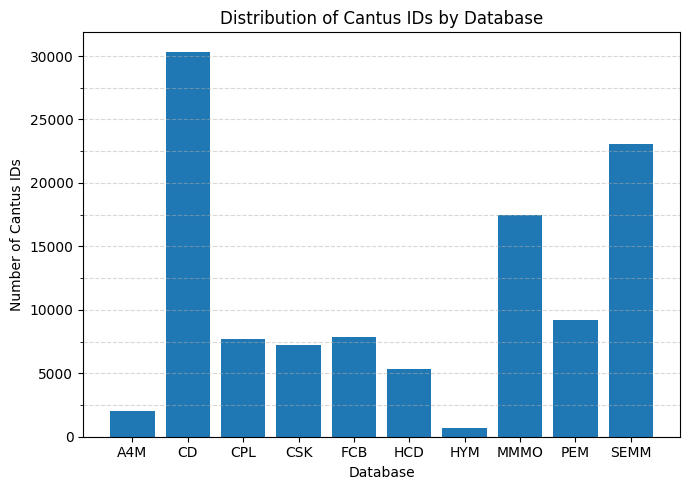

In [19]:
# Distribution of cantus_ids
srclinks_per_db = chants.groupby('db')['cantus_id'].nunique().to_dict()

# Plot
plt.figure(figsize=(7, 5))
plt.bar(srclinks_per_db.keys(), srclinks_per_db.values(), color='tab:blue')

plt.title('Distribution of Cantus IDs by Database')
plt.xlabel('Database')
plt.ylabel('Number of Cantus IDs')

max_y = 30000
grid_interval = 2500
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))  # actual labeled ticks (less frequent)
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)
plt.gca().set_yticks(np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)

plt.tight_layout()
plt.show()


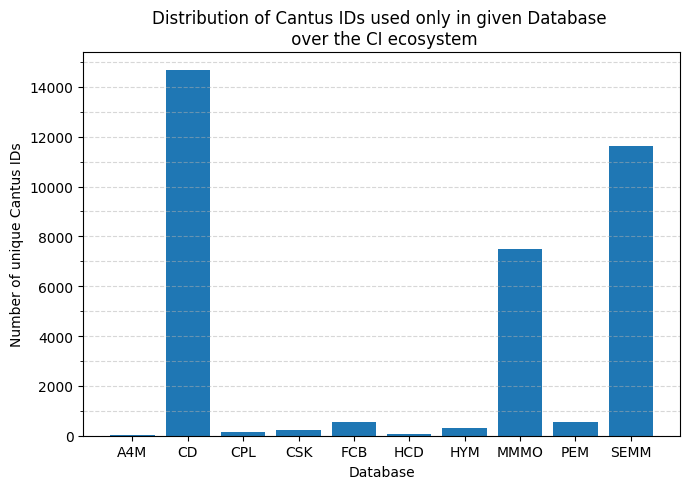

In [20]:
# Distribution of CIDs unique for given db in the ecosystem
db_groups = chants.groupby('db')['cantus_id'].apply(set)

unique_counts = {}
for db, ids in db_groups.items():
    other_ids = set().union(*(db_groups[other_db] for other_db in db_groups.index if other_db != db))
    unique_to_db = ids - other_ids
    unique_counts[db] = len(unique_to_db)

# Plot
plt.figure(figsize=(7, 5))
plt.bar(unique_counts.keys(), unique_counts.values(), color='tab:blue')

plt.title('Distribution of Cantus IDs used only in given Database \n over the CI ecosystem')
plt.xlabel('Database')
plt.ylabel('Number of unique Cantus IDs')

max_y = 15000
grid_interval = 1000
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))  # actual labeled ticks (less frequent)
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)
plt.gca().set_yticks(np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)

plt.tight_layout()
plt.show()